In [ ]:
import sys
sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/MCPC_Clustering/Codes')
sys.path.append('I:/내 드라이브/backup/document/USC/Research/MCPC/Code/Codes')

In [ ]:
# This code is to test Louvain Method with custom Modularity Function
import numpy as np
import networkx as nx
import networkx.algorithms.community.quality as nx_quality
import networkx.algorithms.community as nx_comm
# from Custom_Func import directed_modularity, modularity, _one_level


In [ ]:
%load_ext autoreload
%autoreload 2
import importlib

import Real_Custom_v2 as Real_Custom
Real_Custom = importlib.reload(Real_Custom)

import FlowRank as FR
FR=importlib.reload(FR)

## Loading dataset

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from pynndescent import NNDescent
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
# from scanpy import read_h5ad
# import utils
import scipy
from scipy import sparse
import metric as met 
# import simulation as simm
import embedding as embed
import FlowRank as FR

from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from sklearn.metrics import v_measure_score as v_score
from sklearn.metrics import homogeneity_score as homogeneity
from sklearn.metrics import completeness_score as completeness


In [ ]:
# data = sparse.load_npz('I:/내 드라이브/backup/document/USC/Research/MCPC/pca-benchmarks/pca-benchmarks/data/ALM/data.npz')
# data = data.todense()
# data = np.array(data)


## Zhengmix dataset

In [ ]:
name='Zhengmix'
kchoice=20 #k neighbors in KNN
datapath = 'I:/내 드라이브/backup/document/USC/Research/MCPC/pca-benchmarks/pca-benchmarks/data/'

X = scipy.sparse.load_npz(datapath+name + '/data.npz')
label = np.load(datapath+name+'/labels.npy')
print(name,len(label))

#Log transform+PCA
X.data = np.log1p(X.data)
print("Log transform done")
pca = TruncatedSVD(n_components=50)
PX = pca.fit_transform(X)
n=PX.shape[0]
walk_len_c1=int(np.log2(n))
print(PX.shape)


#Calculte inital KNN accuracy
met.KNN_graph_acc(PX,kchoice,0,label)

# #Get the KNN edgelist
edge_list,vlist=embed.dir_KNN_graph(PX,kchoice,0)
print(len(edge_list))

#Make a NetworkX Directed Graph from the edgelist
G = nx.DiGraph()
for (u,v) in edge_list:
    G.add_edge(u,v,weight=1)

In [ ]:
from collections import defaultdict, deque

def get_labels(partition,n_s):
    final_partition_1 = deque(partition, maxlen=1).pop()
    #print(final_partition_1)


    label_1=np.zeros((n_s))
    c=0
    for sets in final_partition_1:
        for ell in sets:
            label_1[ell]=c
        
        c=c+1

    return label_1

## Result Metrics Table and Visualization

In [ ]:
import analysis as an
n=len(G.nodes())
res_=[]
res_list=[0.1,0.3,0.5,0.7,0.85,0.95,1,1.05,1.1,1.3,1.5,3,5,7,10]
#res_list=[0.8,1]
labels=[]
total_labels=[]
names = ['Louvain','Cust_Rand','Cust_FR_order','Cust_FR_Recalc']

for res in res_list:
    partition = nx_comm.louvain.louvain_partitions(G, seed=0,resolution=res)
    label_new=get_labels(partition,n)
    labels.append(label_new)
    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
total_labels.append(labels)
res_.append(res_list)
#print("\n\n")
print('Louvain Done')
labels=[]
#res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,5,7,10]
res_list=[0.1,0.3,0.5,0.7,1.1,1.3,1.5,3,20,30,40,50,60,70,100]
#res_list = [1,10]
for res in res_list:
    partition1=Real_Custom.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
    #print(res,round(NMI(label,label_new1),2),round(met.purity_score(label,label_new1),2))
total_labels.append(labels)   
res_.append(res_list)
print('v2 done')
import Real_Custom_v3 as RC3
labels=[]
for res in res_list:
    partition1=RC3.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)
print('v3 done')
import Real_Custom_v4 as RC4
labels=[]
for res in res_list:
    partition1=RC4.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

an.metrics_summary(total_labels,label,res_,names)

## Fashion Mnist Dataset

In [ ]:
import tensorflow as tf
import random
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape,y_train.shape)

X_F=x_train.reshape(x_train.shape[0], 784)
print(X_F.shape)
label_F=y_train

seq=[i for i in range(n)]
subset=random.sample(seq, n//5)

X=X_F[subset,:]
label=label_F[subset]

pca = TruncatedSVD(n_components=50)
PX = pca.fit_transform(X)
n=PX.shape[0]
walk_len_c1=int(np.log2(n))
print(PX.shape)


#Calculte inital KNN accuracy
met.KNN_graph_acc(PX,kchoice,0,label)

#Get the KNN edgelist
edge_list,vlist=embed.dir_KNN_graph(PX,kchoice,0)
print(len(edge_list))

G = nx.DiGraph()
for (u,v) in edge_list:
    G.add_edge(u,v,weight=1)


In [ ]:
import analysis as an
n=len(G.nodes())
res_=[]
res_list=[0.1,0.3,0.5,0.7,0.85,0.95,1,1.05,1.1,1.3,1.5,3,5,7,10]
#res_list=[0.8,1]
labels=[]
total_labels=[]
names = ['Louvain','Cust_Rand','Cust_FR_order','Cust_FR_Recalc']

for res in res_list:
    partition = nx_comm.louvain.louvain_partitions(G, seed=0,resolution=res)
    label_new=get_labels(partition,n)
    labels.append(label_new)
    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
total_labels.append(labels)
res_.append(res_list)
#print("\n\n")

labels=[]
#res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,5,7,10]
res_list=[0.1,0.3,0.5,0.7,1.1,1.3,1.5,3,20,30,40,50,60,70,100]
#res_list = [1,10]
for res in res_list:
    partition1=Real_Custom.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
    #print(res,round(NMI(label,label_new1),2),round(met.purity_score(label,label_new1),2))
total_labels.append(labels)   
res_.append(res_list)

import Real_Custom_v3 as RC3
labels=[]
for res in res_list:
    partition1=RC3.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

import Real_Custom_v4 as RC4
labels=[]
for res in res_list:
    partition1=RC4.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

an.metrics_summary(total_labels,label,res_,names)

## Artificial Graph with Strong MCPC characteristics

In [7]:
def graph_simulation_uniform(sizes,prob_mat):

    kchoice=20

    size1=[0]
    t=0
    n_c=len(sizes)
    n=sum(sizes)
    print(n)

    for i in range(n_c):
        t=t+sizes[i]
        size1.append(t)

    label=[]
    n=sum(sizes)

    
    edge_list=[]
    vlist=[i for i in range(n)]


    for ell in range(len(sizes)):
        for i in range(sizes[ell]):
            label.append(ell)

    rev_map=np.zeros((n))
    for i in range(n):
        l1=label[i]
        x=np.random.uniform(0,1,n)
        for j in range(n):
            l2=label[j]
            if(x[j]<=kchoice/sizes[l2]*prob_mat[l1,l2]):
                edge_list.append((i,j))






    return edge_list,vlist,label,label 



#0,3 and 3,0 are replaced

#0,3 (0.2-beta)/8
#3,0 (0.2+beta)/8

def get_many_graphs(beta,sizes):

    prob_mat=np.array(
    [
    [0.8+beta,7*(0.2-beta)/16,7*(0.2-beta)/16,(0.2-beta)/8],
    [0.4+beta,3*(0.6-beta)/8,3*(0.6-beta)/8,(0.6-beta)/4],
    [(0.6+beta)/4,3*(0.6+beta)/8,3*(0.6+beta)/8,0.4-beta],
    [(0.2+beta)/8,7*(0.2+beta)/16,7*(0.2+beta)/16,0.8-beta]
    ]
    )
    
    print(prob_mat.shape)

    print(prob_mat)

    edge_list,vlist,label1,sub_label=graph_simulation_uniform(sizes,prob_mat)

    return edge_list,vlist,label1,sub_label

In [12]:
sizes=[250,250,250,250]
edge_list,vlist,label,sub_label=get_many_graphs(0,sizes)

G=nx.DiGraph()
for (u,v) in edge_list:
    G.add_edge(u,v,weight=1)

(4, 4)
[[0.80 0.09 0.09 0.03]
 [0.40 0.22 0.22 0.15]
 [0.15 0.22 0.22 0.40]
 [0.03 0.09 0.09 0.80]]
1000


         NMI  Purity  V-score  Homogeneity  Completeness
0.10    0.00    0.25     0.00         0.00          1.00
0.30    0.00    0.25     0.00         0.00          1.00
0.50    0.47    0.50     0.47         0.34          0.75
0.70    0.44    0.50     0.44         0.33          0.67
0.85    0.54    0.63     0.54         0.48          0.62
0.95    0.61    0.68     0.61         0.55          0.70
1.00    0.64    0.70     0.64         0.58          0.73
1.05    0.58    0.72     0.58         0.61          0.55
1.10    0.60    0.74     0.60         0.64          0.57
1.30    0.56    0.76     0.56         0.71          0.46
1.50    0.54    0.77     0.54         0.71          0.44
3.00    0.22    0.65     0.22         0.45          0.14
5.00    0.21    0.65     0.21         0.48          0.13
7.00    0.23    0.70     0.23         0.56          0.15
10.00   0.24    0.71     0.24         0.61          0.15
0.10    0.00    0.25     0.00         0.00          1.00
0.30    0.00    0.25     0.00  

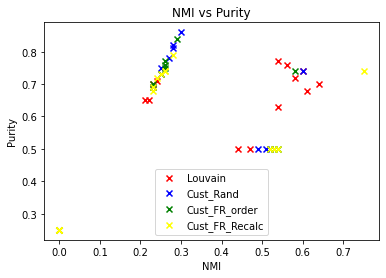

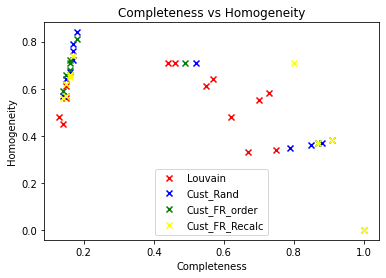

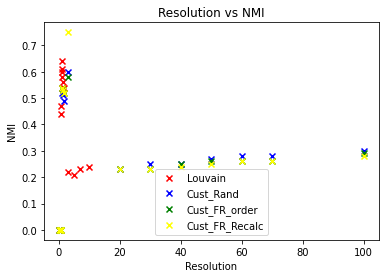

In [13]:
import analysis as an
n=len(G.nodes())
res_=[]
res_list=[0.1,0.3,0.5,0.7,0.85,0.95,1,1.05,1.1,1.3,1.5,3,5,7,10]
#res_list=[0.8,1]
labels=[]
total_labels=[]
names = ['Louvain','Cust_Rand','Cust_FR_order','Cust_FR_Recalc']

for res in res_list:
    partition = nx_comm.louvain.louvain_partitions(G, seed=0,resolution=res)
    label_new=get_labels(partition,n)
    labels.append(label_new)
    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
total_labels.append(labels)
res_.append(res_list)
#print("\n\n")

labels=[]
#res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,5,7,10]
res_list=[0.1,0.3,0.5,0.7,1.1,1.3,1.5,3,20,30,40,50,60,70,100]
#res_list = [1,10]
for res in res_list:
    partition1=Real_Custom.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
    #print(res,round(NMI(label,label_new1),2),round(met.purity_score(label,label_new1),2))
total_labels.append(labels)   
res_.append(res_list)

import Real_Custom_v3 as RC3
labels=[]
for res in res_list:
    partition1=RC3.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

import Real_Custom_v4 as RC4
labels=[]
for res in res_list:
    partition1=RC4.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

an.metrics_summary(total_labels,label,res_,names)